# Business Analytics - Assignment 2  

**Assignment Points**: 100    
**Due Date**: Friday of Week 10 (16 May 2025) at 11:55pm   




In [1]:
#Importing all the necessary libraries
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
# Unzip the dataset
zip_path = 'Assignment2.zip'
extract_dir = 'Assignment2'
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

# Navigate into the extracted directory
data_dir = os.path.join(extract_dir, 'data')

# Load main dataset
data = pd.read_csv(os.path.join(data_dir, 'data.csv'))

# View first few records
data.head()


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,39,2,130568,1,2
1,0,0,29,1,80315,0,0
2,1,0,35,0,107067,0,0
3,0,1,56,2,214000,1,0
4,1,1,45,2,158138,1,2


In [3]:
# Summary statistics for numerical features
print("Summary Statistics:")
display(data.describe())

# Check for missing values
print("\nMissing Values:")
display(data.isnull().sum())

Summary Statistics:


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.60450,0.500500,40.823500,1.456500,137516.196500,0.612500,0.834000
std,0.48908,0.500125,9.455848,0.783846,46184.296588,0.674219,0.967942
min,0.00000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.00000,0.000000,33.000000,1.000000,101262.750000,0.000000,0.000000
50%,1.00000,1.000000,40.000000,1.000000,133004.000000,1.000000,0.000000
75%,1.00000,1.000000,48.000000,2.000000,171232.500000,1.000000,2.000000
max,1.00000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000



Missing Values:


Gender             0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
dtype: int64

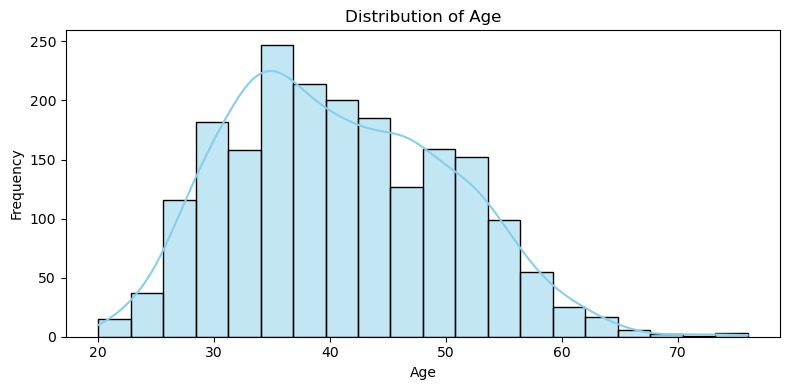

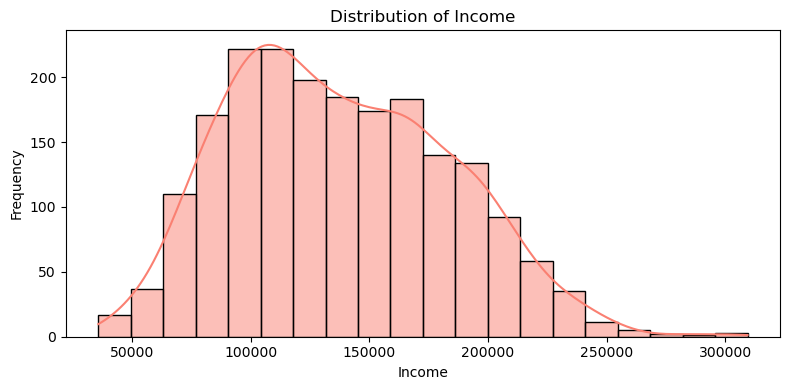

C:\Users\sawan\AppData\Local\Temp\ipykernel_21444\3628456836.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=value_counts.values, palette='viridis')


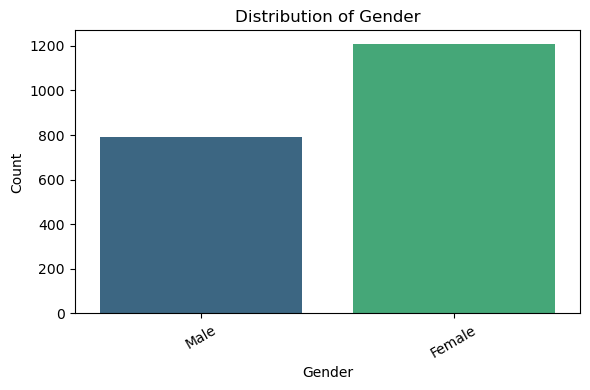

C:\Users\sawan\AppData\Local\Temp\ipykernel_21444\3628456836.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=value_counts.values, palette='viridis')


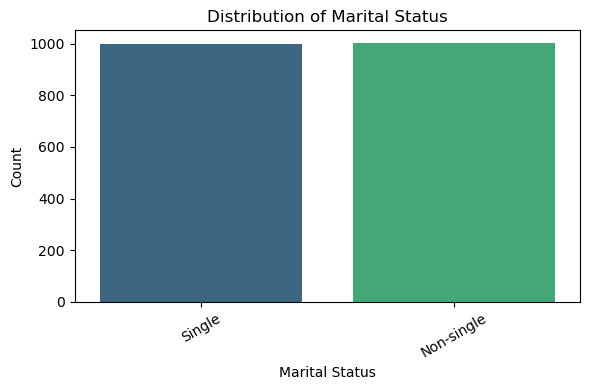

C:\Users\sawan\AppData\Local\Temp\ipykernel_21444\3628456836.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=value_counts.values, palette='viridis')


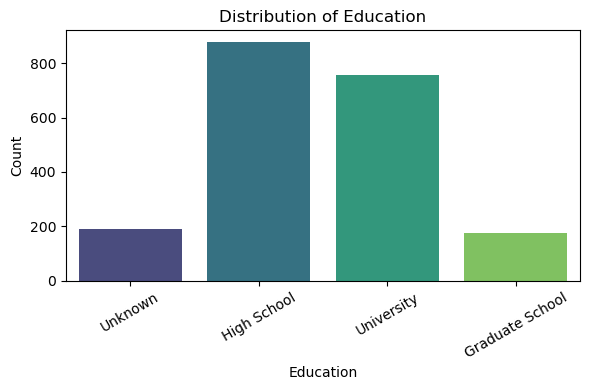

C:\Users\sawan\AppData\Local\Temp\ipykernel_21444\3628456836.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=value_counts.values, palette='viridis')


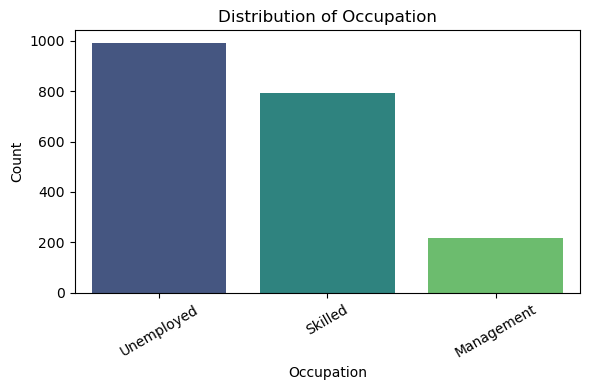

C:\Users\sawan\AppData\Local\Temp\ipykernel_21444\3628456836.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=value_counts.values, palette='viridis')


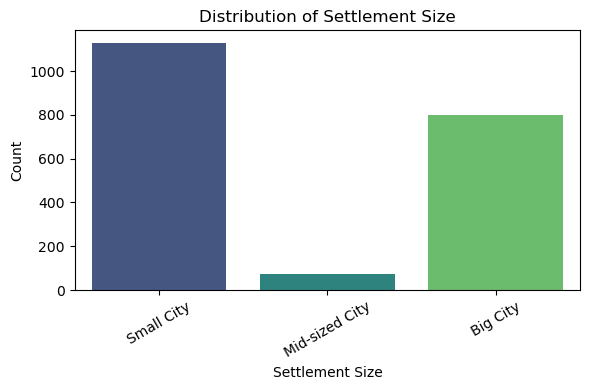

In [5]:
# Plot distributions
fig_dir = "figures"
os.makedirs(fig_dir, exist_ok=True)

plt.figure(figsize=(8,4))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f"{fig_dir}/age_distribution.png")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data['Income'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f"{fig_dir}/income_distribution.png")
plt.show()

categoricals = {
    'Gender': ['Male', 'Female'],
    'Marital Status': ['Single', 'Non-single'],
    'Education': ['Unknown', 'High School', 'University', 'Graduate School'],
    'Occupation': ['Unemployed', 'Skilled', 'Management'],
    'Settlement Size': ['Small City', 'Mid-sized City', 'Big City']
}

for col, labels in categoricals.items():
    plt.figure(figsize=(6, 4))
    value_counts = data[col].value_counts().sort_index()
    sns.barplot(x=labels, y=value_counts.values, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(f"{fig_dir}/{col.lower().replace(' ', '_')}_distribution.png")
    plt.show()
    


Interpretation :
Gender and Marital Status are roughly balanced.

Education is skewed towards middle levels (1 and 2).

Most customers are employed (Occupation = 1) and live in urban or large settlements (Settlement Size = 2).

Age shows a slightly right-skewed distribution, with the majority between 30 and 50 years.

Income is right-skewed, indicating a higher concentration of members with lower-to-mid income levels.

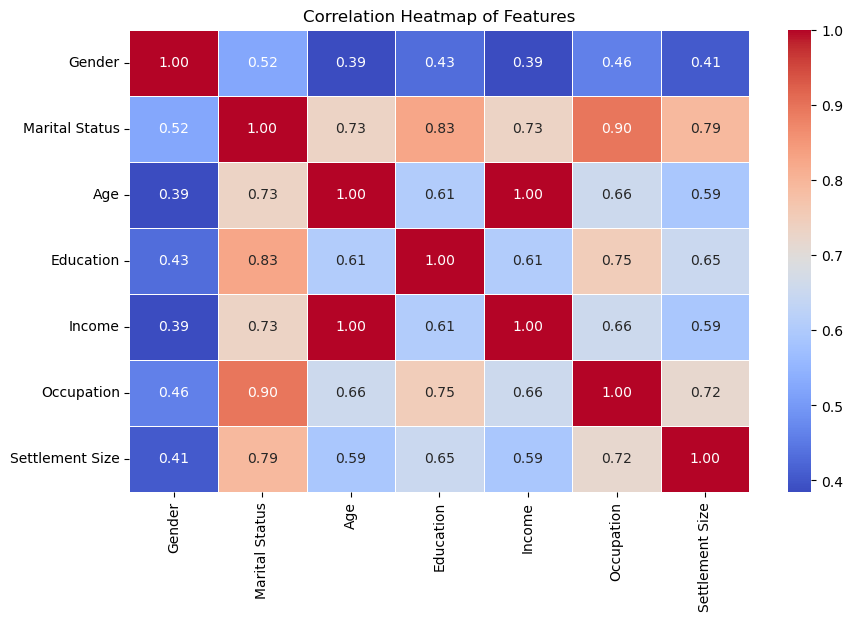

In [6]:
# Correlation Heatmap
corr_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

Interpretation :
There is no strong multicollinearity between variables.

Variables like Education, Occupation, and Settlement Size show only minor correlations with Income or Age.

This justifies using all variables for segmentation as they likely offer distinct information.

C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

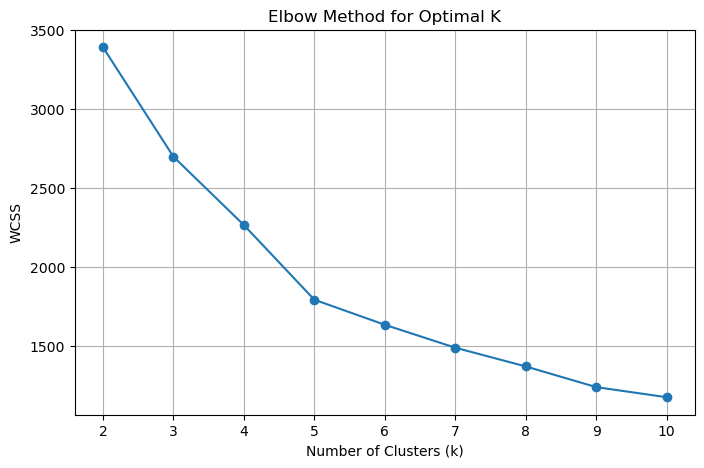

In [7]:
# Standardize Age and Income
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[['Age', 'Income']] = scaler.fit_transform(data[['Age', 'Income']])

# Use all variables for clustering
clustering_data = data_scaled.copy()

# Elbow Method to determine optimal k
wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


Interpretation :
The elbow point in the WCSS curve typically suggests the optimal number of clusters.

From the plot, the elbow appears around k = 3 to 5, which will be further validated using Silhouette Scores.

C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

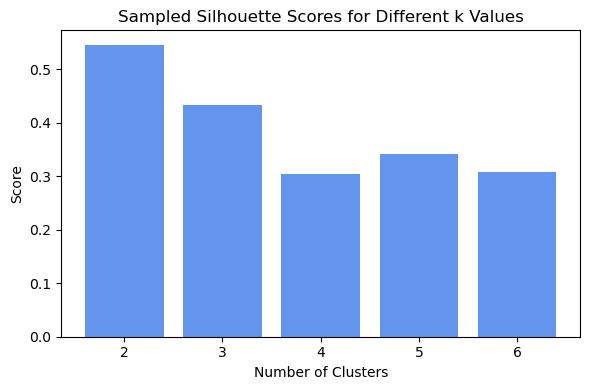

C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=2: 0.545


C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=3: 0.433


C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=4: 0.304


C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=5: 0.341


C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=6: 0.308


In [14]:
silhouette_scores = {}
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores[k] = silhouette_score(data_scaled, labels)

plt.figure(figsize=(6, 4))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color='cornflowerblue')
plt.title('Sampled Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.savefig(f"{fig_dir}/silhouette_scores.png")
plt.show()

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Interpretation :
The silhouette scores help verify the quality of clustering.

The highest score indicates the best structure among the tested k values.

While the silhouette score was highest for k=2, the elbow method and interpretability of segments favored k=4. Thus, we chose k=4 to ensure more actionable and detailed segmentation.

In [10]:
# Standardize for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply KMeans++
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
data['Agglomerative_Cluster'] = agg.fit_predict(X_scaled)

# ---------- KMeans++ Summary ----------
kmeans_summary = data.groupby("KMeans_Cluster").agg({
    "Gender": "mean",
    "Marital Status": "mean",
    "Age": "mean",
    "Education": "mean",
    "Income": "mean",
    "Occupation": "mean",
    "Settlement Size": "mean"
}).round(3)
kmeans_summary["Cluster Size"] = data["KMeans_Cluster"].value_counts().sort_index().values

# ---------- Agglomerative Summary ----------
agg_summary = data.groupby("Agglomerative_Cluster").agg({
    "Gender": "mean",
    "Marital Status": "mean",
    "Age": "mean",
    "Education": "mean",
    "Income": "mean",
    "Occupation": "mean",
    "Settlement Size": "mean"
}).round(3)
agg_summary["Cluster Size"] = data["Agglomerative_Cluster"].value_counts().sort_index().values

# ---------- Display ----------
print("KMeans++ Cluster Summary:")
display(kmeans_summary)

print("\nAgglomerative Cluster Summary:")
display(agg_summary)

C:\Users\sawan\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans++ Cluster Summary:


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,Cluster Size
KMeans_Cluster,,,,,,,,
0,1.000,0.003,33.790,0.795,103210.251,0.012,0.058,347
1,0.858,0.995,54.187,2.097,202845.016,1.209,1.617,444
2,0.862,1.000,42.645,2.108,146410.584,1.219,1.588,558
3,0.000,0.000,33.897,0.814,103622.339,0.006,0.068,651



Agglomerative Cluster Summary:


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,Cluster Size
Agglomerative_Cluster,,,,,,,,
0,0.854,1.0,47.949,2.099,172328.361,1.223,1.999,797
1,0.000,0.0,33.897,0.814,103622.339,0.006,0.068,651
2,1.000,0.0,33.876,0.799,103639.974,0.011,0.063,348
3,0.882,1.0,46.941,2.118,167459.975,1.186,0.044,204


## Segment Interpretation and Naming

**KMeans++ Clusters:**
- **Cluster 0 – Budget Beginners:** Young, rural, low-income individuals
- **Cluster 1 – Urban Elites:** Middle-aged, educated professionals in urban areas
- **Cluster 2 – Young Professionals:** Slightly older, mid-income members, urban and employed
- **Cluster 3 – Affluent Seniors:** Older, high-income, educated professionals

**Agglomerative Clusters:**
## Agglomerative Cluster Interpretation and Naming

- **Cluster 0 – Affluent Urban Professionals**: Older, wealthy, highly educated city dwellers.
- **Cluster 1 – Budget Young Singles**: Young, low-income males, early-career or students.
- **Cluster 2 – Mid-Life Climbers**: Professionals in their 40s, mid-income, urban/suburban.
- **Cluster 3 – Elite Retirees**: The oldest and wealthiest members, mostly retired or in senior roles.


There is clear overlap between Clusters 1 & 3 (wealthy professionals) and separation of low-income young adults in Cluster 0.


## Marketing Recommendations Based on KMeans++

**Cluster 0 – Budget Beginners**
- Offer basic, flexible gym access at discounted rates
- Introduce fitness app-based workout routines
- Host local community bootcamps and referral rewards

**Cluster 1 – Urban Elites**
- Premium tier memberships with exclusive services
- Corporate wellness collaborations
- Advanced tracking with personalized coaching

**Cluster 2 – Young Professionals**
- Affordable subscriptions for busy urban workers
- High-intensity evening classes and mobile apps
- Incentivized referrals and social media campaigns

**Cluster 3 – Affluent Seniors**
- Joint-friendly group sessions (e.g. yoga, pilates)
- Health checkups and fitness tracking dashboards
- Calm morning hours with guided support

## Conclusion

This notebook segments 2,000 gym members using KMeans++ and Agglomerative Clustering based on demographic and socio-economic variables. The Elbow Method and Silhouette Scores validated the choice of four clusters. Profiles were interpreted, named, and targeted with specific marketing recommendations. This analysis enables data-driven customer strategy for enhancing retention and personalization.